# Imports

In [1]:
from proteomic_data_exploration import *

In [2]:
cell_line = pd.read_csv("data/cell_line_quant.csv", index_col = 0)

print(cell_line.shape)
cell_line.head()

(375, 12755)


,S12A2_HUMAN,HXD13_HUMAN,KDM1A_HUMAN,SOX1_HUMAN,SOX2_HUMAN,SOX3_HUMAN,SOX15_HUMAN,PHX2B_HUMAN,ALX4_HUMAN,ALX1_HUMAN,...,S46A3_HUMAN,NU2M_HUMAN,NU3M_HUMAN,BMP6_HUMAN,MET20_HUMAN,CCL26_HUMAN,AL5AP_HUMAN,CYTM1_HUMAN,MGST2_HUMAN,CNIH4_HUMAN
Cell line name,,,,,,,,,,,,,,,,,,,,,
MDAMB468_BREAST_TenPx01,2.111348,NaN,0.379683,NaN,-0.246367,NaN,NaN,NaN,NaN,NaN,...,1.040703,NaN,0.433789,NaN,NaN,NaN,NaN,-0.313512,NaN,0.138191
SH4_SKIN_TenPx01,0.070468,NaN,-0.283538,NaN,-0.572753,NaN,NaN,NaN,NaN,NaN,...,-0.949250,NaN,-0.149629,NaN,NaN,NaN,NaN,0.105086,NaN,0.355856
AU565_BREAST_TenPx01,-0.463928,NaN,0.191211,NaN,-0.341305,NaN,NaN,NaN,NaN,NaN,...,0.242156,NaN,-0.376248,NaN,NaN,NaN,NaN,-0.586815,NaN,0.001459
KMRC1_KIDNEY_TenPx01,-0.883645,NaN,-0.595606,NaN,-0.335211,NaN,NaN,NaN,NaN,NaN,...,1.222895,NaN,-0.915686,NaN,NaN,NaN,NaN,-0.132940,NaN,0.172501
CAL51_BREAST_TenPx01,0.788565,NaN,0.391243,NaN,-0.124474,NaN,NaN,NaN,NaN,NaN,...,-0.212603,NaN,0.793730,NaN,NaN,NaN,NaN,0.452423,NaN,0.200756


# NAs

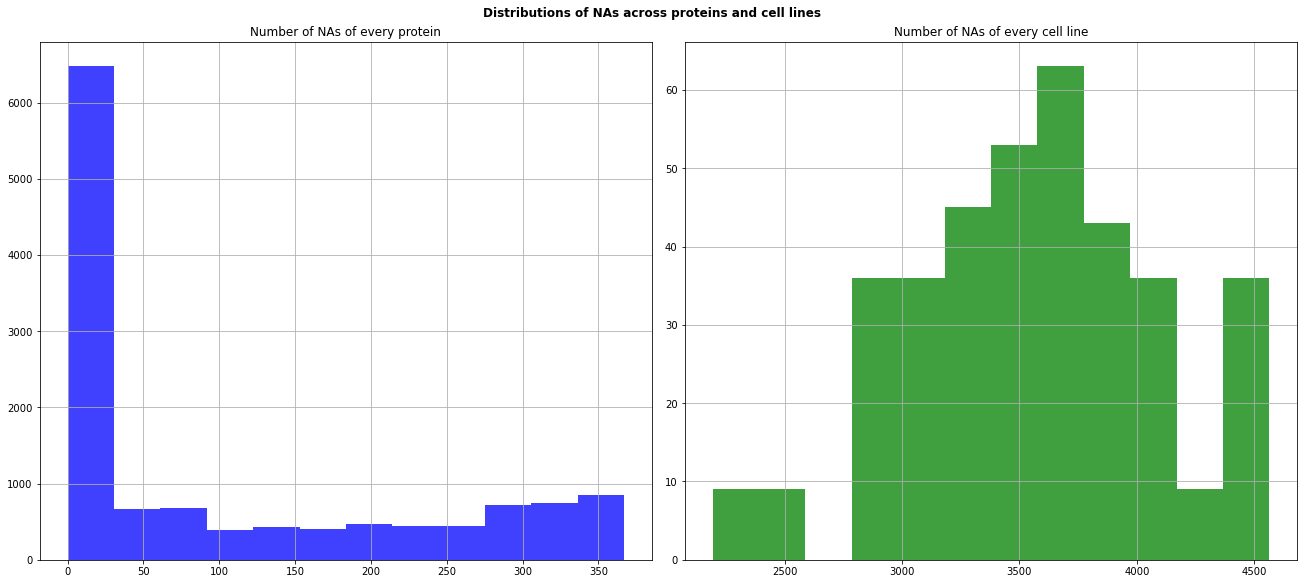

In [3]:
plot_na(cell_line)

12755 -> 7517 = reduction of 41% in size


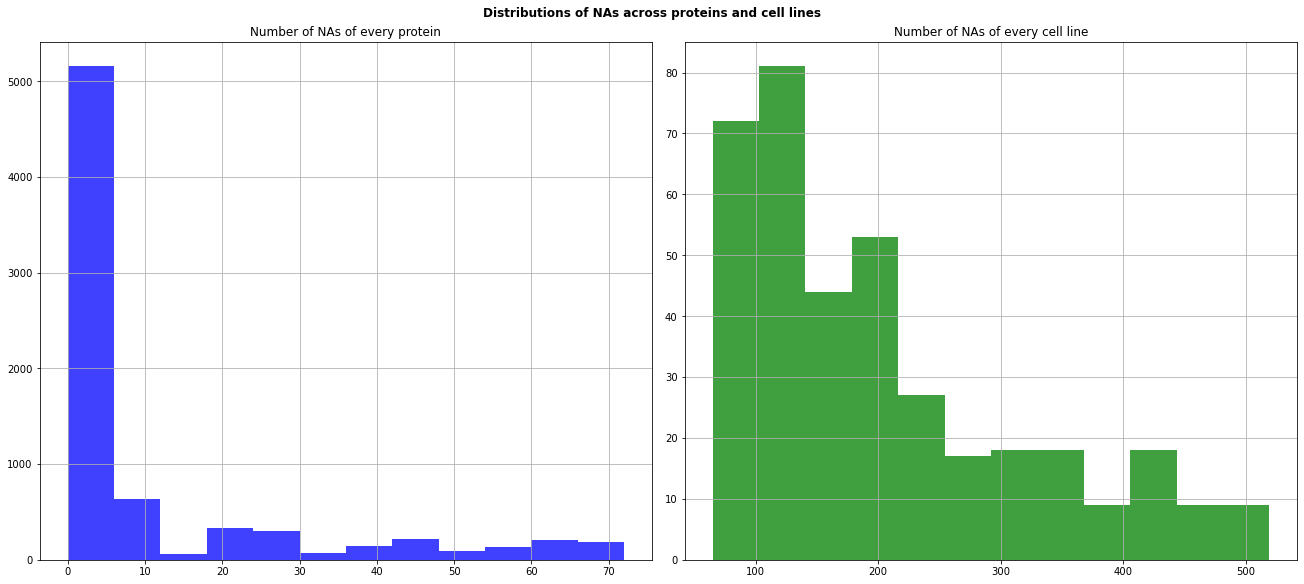

In [3]:
# removing proteins that have more than 20% NAs
cell_line_filtered = filter_na(cell_line, verbose = True, threshold = 0.2)
plot_na(cell_line_filtered)

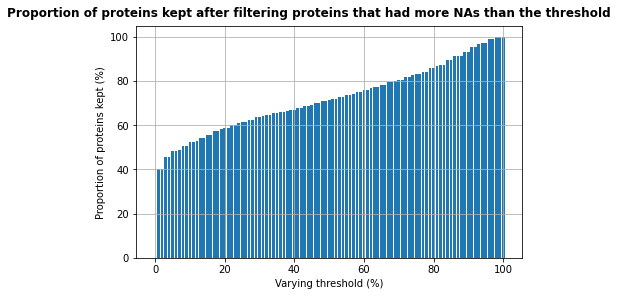

In [5]:
plot_varying_size_dataset(cell_line)

# All values

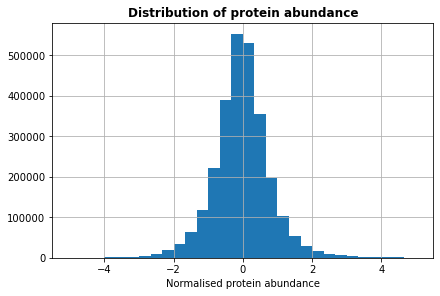

In [6]:
plot_hist_values(cell_line_filtered)

The minimum and maximum protein absolute values of the dataset are, respectively, 3.52e-07 and 11.0


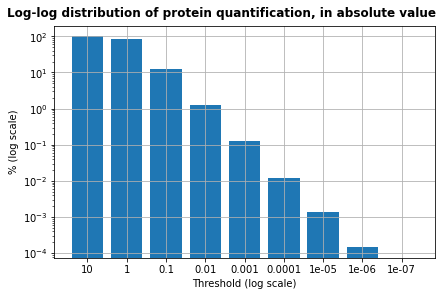

In [12]:
plot_log_log_absolute_distrib(cell_line_filtered, verbose = True)

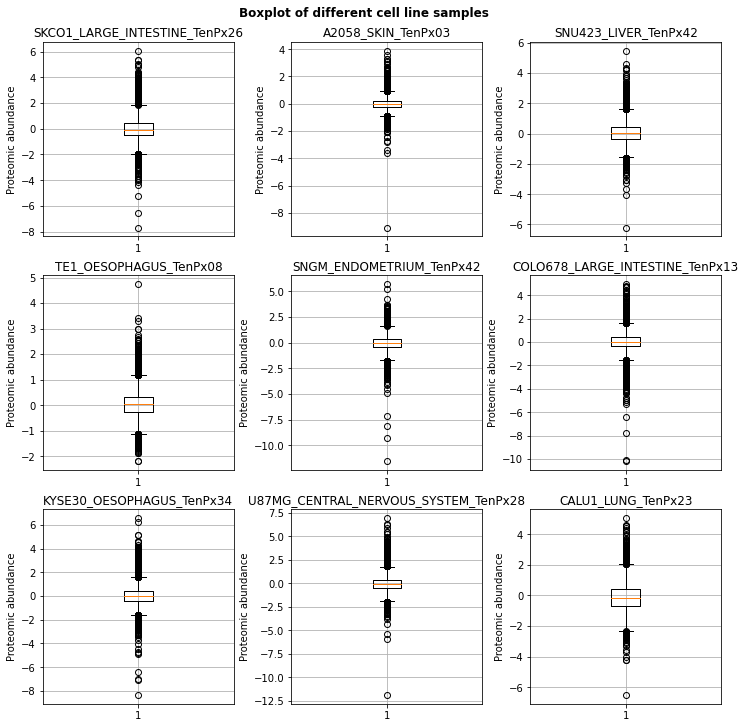

In [11]:
plot_random_boxplot(cell_line_filtered, shape = (3, 3), seed = 19, save = True)

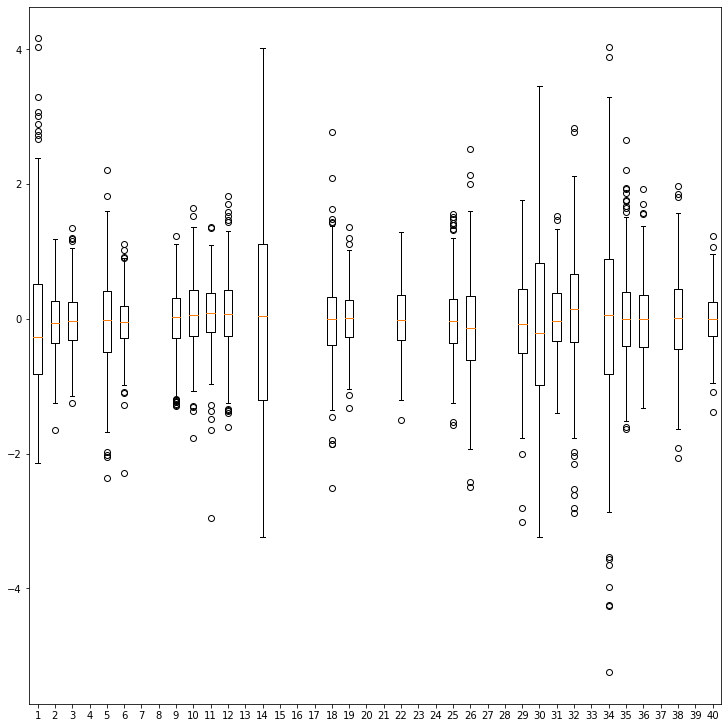

In [22]:
fig, ax = plt.subplots(figsize = (10,10), constrained_layout = True)
ax.boxplot(cell_line_filtered.iloc[:,:40]);

# Heatmap

In [5]:
corr = cell_line_filtered.corr()

corr.columns = map(lambda elem: elem.split("_")[0], list(corr.columns))
corr.index = corr.columns

### Reduce the number of proteins (correlation > 0.935, common proteins highly correlated >= 3)

There are 11 proteins.
Visually, the correlated groups are (first heatmap): {0: {'RL18A', 'RL7A'}, 1: {'RL13A', 'RL7A'}, 2: {'WDR3', 'PWP2', 'TBL3'}, 3: {'MCM6', 'MCM7', 'MCM2'}, 4: {'RL18A', 'RL13A'}} 

But in reality, after ordering the proteins (second heatmap)
The correlated groups are the following:
{'WDR3', 'PWP2', 'TBL3'} {'MCM6', 'MCM7', 'MCM2'} {'RL18A', 'RL13A', 'RL7A'}


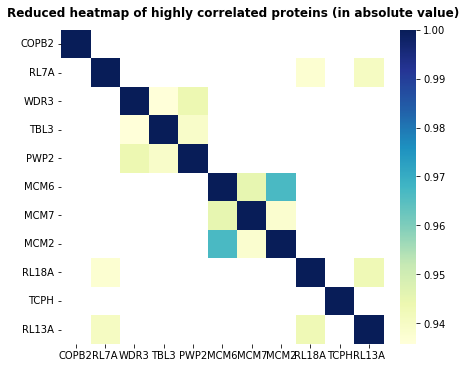

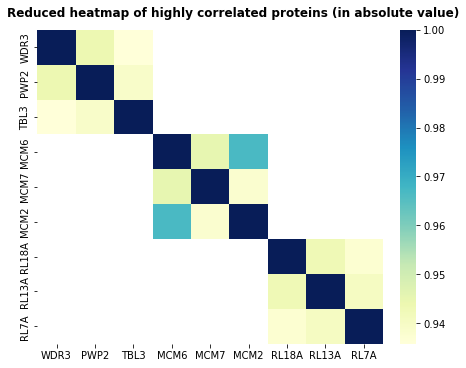

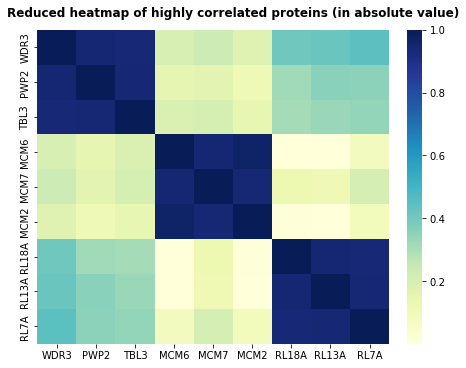

In [13]:
reduced_corr = find_corr_proteins(corr, corr_thresh = 0.935, common_feat_thresh = 3, high_only = True)
print(f"There are {reduced_corr.shape[0]} proteins.")
plot_reduced_heatmap(reduced_corr)

investigate_corr = ReducedCorrelation(reduced_corr)
print("Visually, the correlated groups are (first heatmap):", investigate_corr.create_visually_adjacent_groups(), "\n")

print("But in reality, after ordering the proteins (second heatmap)")
investigate_corr.plot_grouped_heatmap()
investigate_corr.plot_grouped_heatmap(all_corr = corr, random = True, verbose = False)

### Specific groups of proteins (correlation > 0.95, common proteins highly correlated >= 2)

There are 12 proteins.
The correlated groups are the following:
{'POTEF', 'ACTA'} {'WDR36', 'WDR3'} {'MCM6', 'MCM2'} {'UE2NL', 'UBE2N'} {'E9PCR7', 'ODO1'} {'DYRL1', 'DYR'}


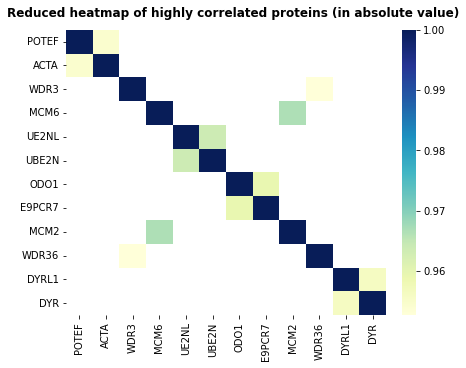

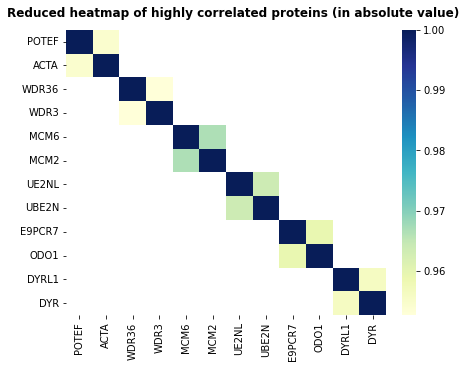

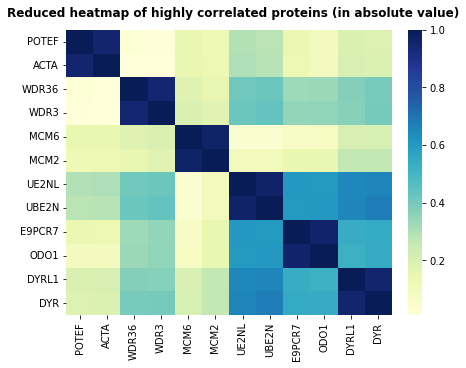

In [14]:
reduced_corr = find_corr_proteins(corr, corr_thresh = 0.95, common_feat_thresh = 2, high_only = True)
print(f"There are {reduced_corr.shape[0]} proteins.")
plot_reduced_heatmap(reduced_corr)

investigate_corr = ReducedCorrelation(reduced_corr)
investigate_corr.plot_grouped_heatmap(random = True)
investigate_corr.plot_grouped_heatmap(verbose = False, all_corr = corr, random = True)

### Allow more proteins (correlation > 0.9, common proteins highly correlated >= 5) ==> Different visualisation options give different visualisations

There are 16 proteins.
The correlated groups are the following:
{'MCM6_HUMAN', 'MCM7_HUMAN'} {'RS13_HUMAN', 'RL28_HUMAN', 'RL7_HUMAN', 'RL10A_HUMAN', 'RS9_HUMAN', 'RL13A_HUMAN', 'RL18A_HUMAN', 'RS11_HUMAN', 'RL6_HUMAN', 'RL15_HUMAN', 'RL7A_HUMAN', 'RL3_HUMAN', 'RL26_HUMAN'}


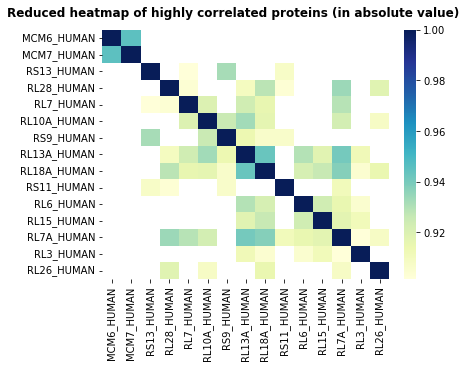

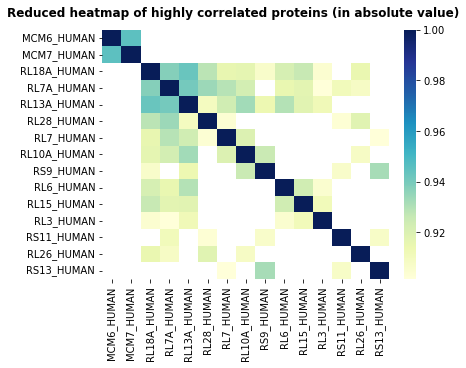

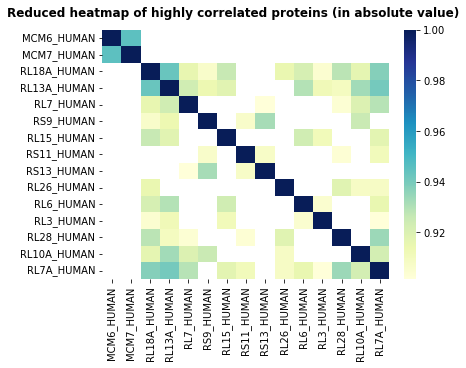

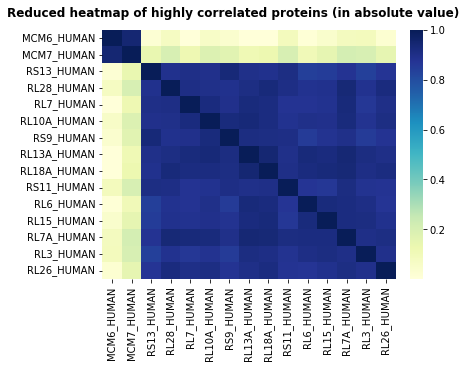

In [12]:
reduced_corr = find_corr_proteins(corr, corr_thresh = 0.9, common_feat_thresh = 5, high_only = True)
print(f"There are {reduced_corr.shape[0]} proteins.")

investigate_corr = ReducedCorrelation(reduced_corr)
investigate_corr.plot_grouped_heatmap(verbose = True, random = True)
investigate_corr.plot_grouped_heatmap(verbose = False, random = False, square = False)
investigate_corr.plot_grouped_heatmap(verbose = False, random = False, square = True)
investigate_corr.plot_grouped_heatmap(verbose = False, random = True, all_corr = corr)

### Too many proteins (correlation > 0.94, common proteins highly correlated >= 2) ==> The graph becomes quite messy

There are 41 proteins.
The correlated groups are the following:
{'STMN1', 'STMN2'} {'POTEF', 'ACTA'} {'KIF4B', 'KIF4A'} {'AT1A1', 'AT12A'} {'COPB2', 'COPA'} {'PERI', 'VIME'} {'G3P', 'G3PT'} {'CND1', 'CND3'} {'TCPB', 'TCPE'} {'SMC4', 'SMC2'} {'WDR36', 'WDR3', 'PWP2'} {'RNH2A', 'RNH2C'} {'MCM6', 'MCM7', 'MCM2'} {'UE2NL', 'UBE2N'} {'E9PCR7', 'ODO1'} {'TAP2', 'TAP1'} {'RL18A', 'RL13A', 'RL7A'} {'IN35', 'NMI'} {'DYRL1', 'DYR'}


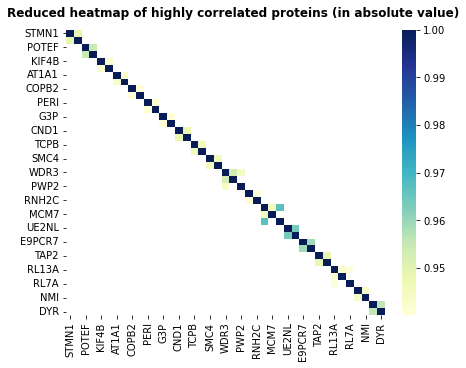

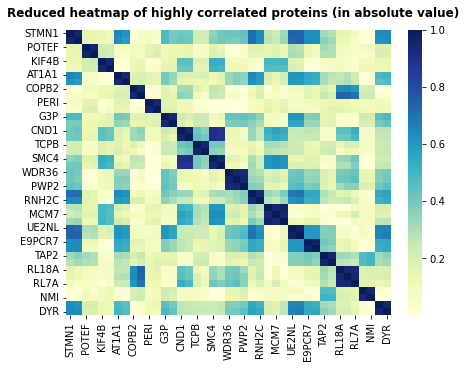

In [16]:
reduced_corr = find_corr_proteins(corr, corr_thresh = 0.94, common_feat_thresh = 2, high_only = True)
print(f"There are {reduced_corr.shape[0]} proteins.")

investigate_corr = ReducedCorrelation(reduced_corr)
investigate_corr.plot_grouped_heatmap()
investigate_corr.plot_grouped_heatmap(verbose = False, all_corr = corr, random = True)

# Protein isoforms

In [7]:
df = pd.read_csv("data/protein_quant_normalized.csv")
df.shape

variants = GeneIsoforms(df)

variants.count_isoforms(verbose = True)

Total number of protein isoforms: 983 (7.7% of the dataset)
Total number of genes involved: 455


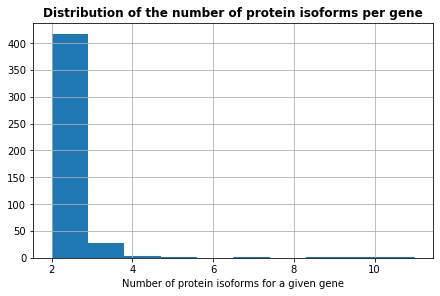

In [8]:
variants.plot_isoform_gene()

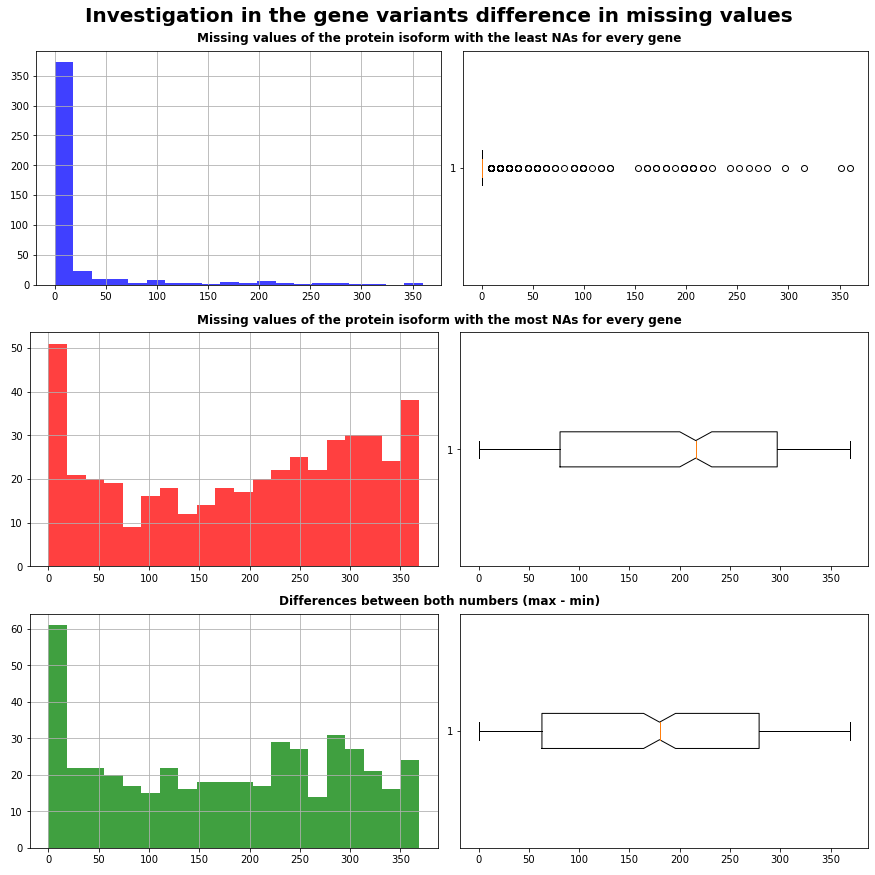

In [9]:
variants.plot_na_isoforms()